# Roof top module data processor

## 1. Parameter inputs

| Parameter Name | Format | Description | Example |
| --- | --- | --- | --- |
| path | string | a path of the folder the access file for module IV data is stored | r'C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data'|
| starting_day | string | the first day to start plotting | '2022_1_2' |
| ending_day | string | the last day to plot | '2022_12_31' |
| starting_time | string | the time in the first day to start plotting | '8:00:00 AM' |
| ending_time | string | the time in the last day to plot | '9:00:00 PM' |
| module_number_list | integer list | a list of module to investigate, ranging from 1 to 6 | [1, 3, 6] |
| sample_length | string | the period for resampling | 'hour', 'day', 'month' (other input won't make it resample)|
| percentile | integer | select the top percentile of the electrical data | 90 |
| T_central | float | the central temperature value to select, unit is ($^{\circ}C$) | 45 |
| dT | float | the selected data should be with the range of T_central $\pm$ dT ($^{\circ}C$), if you don't want filtering, input a big number (e.g., 1000)| 5|
| Ir_central | float | the central irradiance value to select, unit is (W/$m^{2}$) | 800 |
| dIr | float | the selected data should be with the range of Ir_central $\pm$ dIr (W/$m^{2}$), if you don't want filtering, input a big number (e.g., 1000)| 50 |


In [45]:
# path to read
# path = r'C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data'
path = r'C:\Users\sijin wang\OneDrive - UNSW\RA\Roof_module_data'

# plotting time
starting_day = '2022_1_1'
ending_day = '2022_12_31'
starting_time = '8:00:00 AM'
ending_time = '9:00:00 PM'

# define the resampling parameters
sample_length = 'minute'
percentile = 90

# define the data selection parameters
# for temperatures:
T_central=20
dT = 250
# for irradiance:
Ir_central = 1000
dIr = 10

## 2. Data preparation

No need to change any of the content below, just run the following cell.

In [46]:
# import the library
import pyodbc
from sqlalchemy import create_engine
import csv
from data_processor_object import *
import matplotlib.pyplot as plt
import os
import glob

# create a list of paths of each access file we need to open
paths = []
# Loop through all the files in the folder and add their paths to the list
for file_name in os.listdir(path):
    if os.path.isfile(os.path.join(path, file_name)):
        paths.append(str((os.path.join(path, file_name))))

# define the object
data1 = module_data_processor(path = paths, starting_day=starting_day, ending_day=ending_day, starting_time=starting_time, ending_time=ending_time)

# create a list of list for all dates to select paths.
data1.file_date_reader()

# extract the data either from access file or from the pickle file.
data1.pickle_extractor()


Successfully found the pickle file, The pickle file name is: 2022_1_1 2022_12_31.pkl
The stored pickle file matches the date requirement, so just read pd dataframe from pickle file


## 3. Module comparison plot

### 3.1. Input: 

* "Module_number_list": is a list of number of modules, we have six module ranging from 1 to 6. One example can be [1, 3, 4] meaning we select module 1, module 3 and module 4 for plotting.
* "interpolate": is a boolean input, if true, the plot will interpolate the data when ploting against time with a given resampling period.
* "y_param_num" and "x_param_num" are numbers to select the parameter to plot. The corresponding parameter for each numbers are shown below:

| Parameter number | Parameter name |
| --- | --- |
| 0 | Absolute humidity % |
| 1 | Ambient temperature (C) |
| 2 | Modulte temperature (C) |
| 3 | Irradiance (W/m2) |
| 4 | Voc(V) |
| 5 | Isc(A) |
| 6 | Maximum power voltage (V) |
| 7 | Maximum power current (A) |
| 8 | Maximum power (W) |
| 9 | Fill factor (%) |
| 10 | Efficiency (%) |
| 11 | time |


In [47]:
# a list of module to plot
module_number_list = [1, 6]
# whether interpolate
interpolate = False
# select the parameter to compare on
y_param_num = 4
# select the parameter as x axis
x_param_num = 11

### 3.2. Plotting

c:\Users\sijin wang\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\apply.py:577: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  return f(*args, **kwargs)


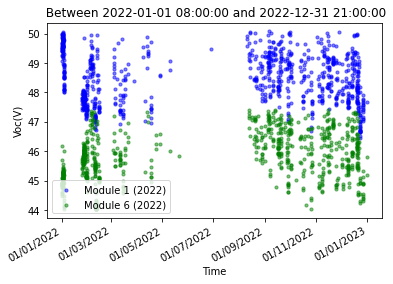

In [48]:
# data preperation
# select the module to plot: range from 1 to 6
data1.module_selector(module_num_list=module_number_list)

# resample the module: options are 'hour', 'day', 'month', put anything else it will not resample.
data1.multi_module_resampler(sample_length=sample_length, quantile_v=percentile/100)
# print(data1.module_df_sampled)

# Select Temperature and Irradiance range
data1.bin_selector(param_name='MT', centre_value=T_central, rangevalue=dT)
data1.bin_selector(param_name='IR_BEV', centre_value=Ir_central, rangevalue=dIr)
# print(data1.module_df_sampled)

y_available_list = ['Absolute humidity %', 'Ambient temperature (C)', 'Modulte temperature (C)', 'Irradiance (W/m2)', 'Voc(V)', 'Isc(A)', 'Maximum power voltage (V)', 'Maximum power current (A)', 'Maximum power (W)', 'Fill factor (%)', 'Efficiency (%)']
x_available_list = ['Absolute humidity %', 'Ambient temperature (C)', 'Modulte temperature (C)', 'Irradiance (W/m2)', 'Voc(V)', 'Isc(A)', 'Maximum power voltage (V)', 'Maximum power current (A)', 'Maximum power (W)', 'Fill factor (%)', 'Efficiency (%)', 'time']
# extract the x and y paramter
x_name = x_available_list[int(x_param_num)]
y_name = y_available_list[int(y_param_num)]
# for the case x_name is time
if x_name == 'time':
    # check whether y_name is in the available list
    if y_name in y_available_list:
        if interpolate == True:
            data1.data_ploter_with_time_multimodule(target_name=data1.param_name_dict[str(y_name)], interpol=True, transparency=0.1)
        else:
            data1.data_ploter_with_time_multimodule(target_name=data1.param_name_dict[str(y_name)])
    else:
        print('Please select a parameter name from the available list (note that y cannot be time)')
else:
    # for the case when x_name is a parameter
    data1.data_parameter_plot_multimodule(x_name=data1.param_name_dict[x_name], y_name=data1.param_name_dict[y_name])

## 4. Plotting parameters with color bars

### 4.1. Inputs

* "Module_number_list": is a list of number of modules, we have six module ranging from 1 to 6.
* The "x_param_num", "y_param_num" and "color_code_param_num" are the number to select the parameter on x axis, y axis and the color bar repsectively. The number and the corresponding parameters are shown below:

| Parameter number | Parameter name |
| --- | --- |
| 0 | Absolute humidity % |
| 1 | Ambient temperature (C) |
| 2 | Modulte temperature (C) |
| 3 | Irradiance (W/m2) |
| 4 | Voc(V) |
| 5 | Isc(A) |
| 6 | Maximum power voltage (V) |
| 7 | Maximum power current (A) |
| 8 | Maximum power (W) |
| 9 | Fill factor (%) |
| 10 | Efficiency (%) |


In [53]:
# select the module to plot: only one module
module_number_list = [3, 1, 2, 4, 5, 6]
# select the parameter to compare on
y_param_num = 4
# select the parameter as x axis
x_param_num = 2
# select the parameter to apply colour code
color_code_param_num = 3

### 4.2. Plotting

c:\Users\sijin wang\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\apply.py:577: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  return f(*args, **kwargs)


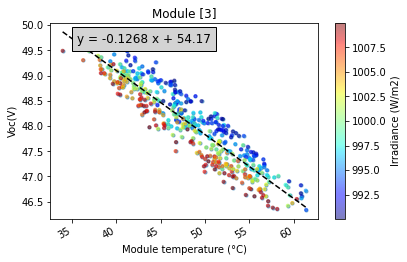

c:\Users\sijin wang\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\apply.py:577: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  return f(*args, **kwargs)


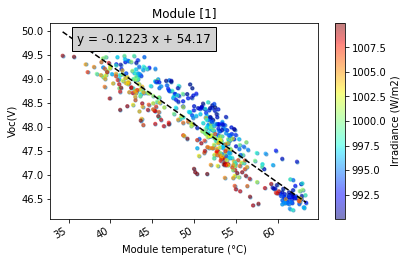

c:\Users\sijin wang\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\apply.py:577: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  return f(*args, **kwargs)


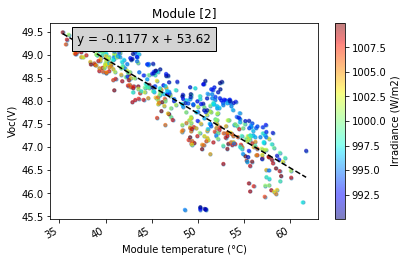

c:\Users\sijin wang\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\apply.py:577: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  return f(*args, **kwargs)


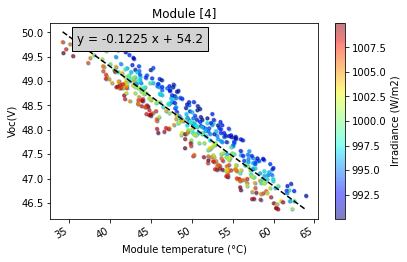

c:\Users\sijin wang\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\apply.py:577: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  return f(*args, **kwargs)


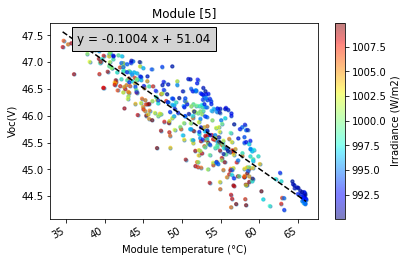

c:\Users\sijin wang\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\apply.py:577: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  return f(*args, **kwargs)


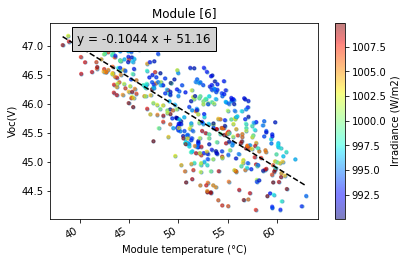

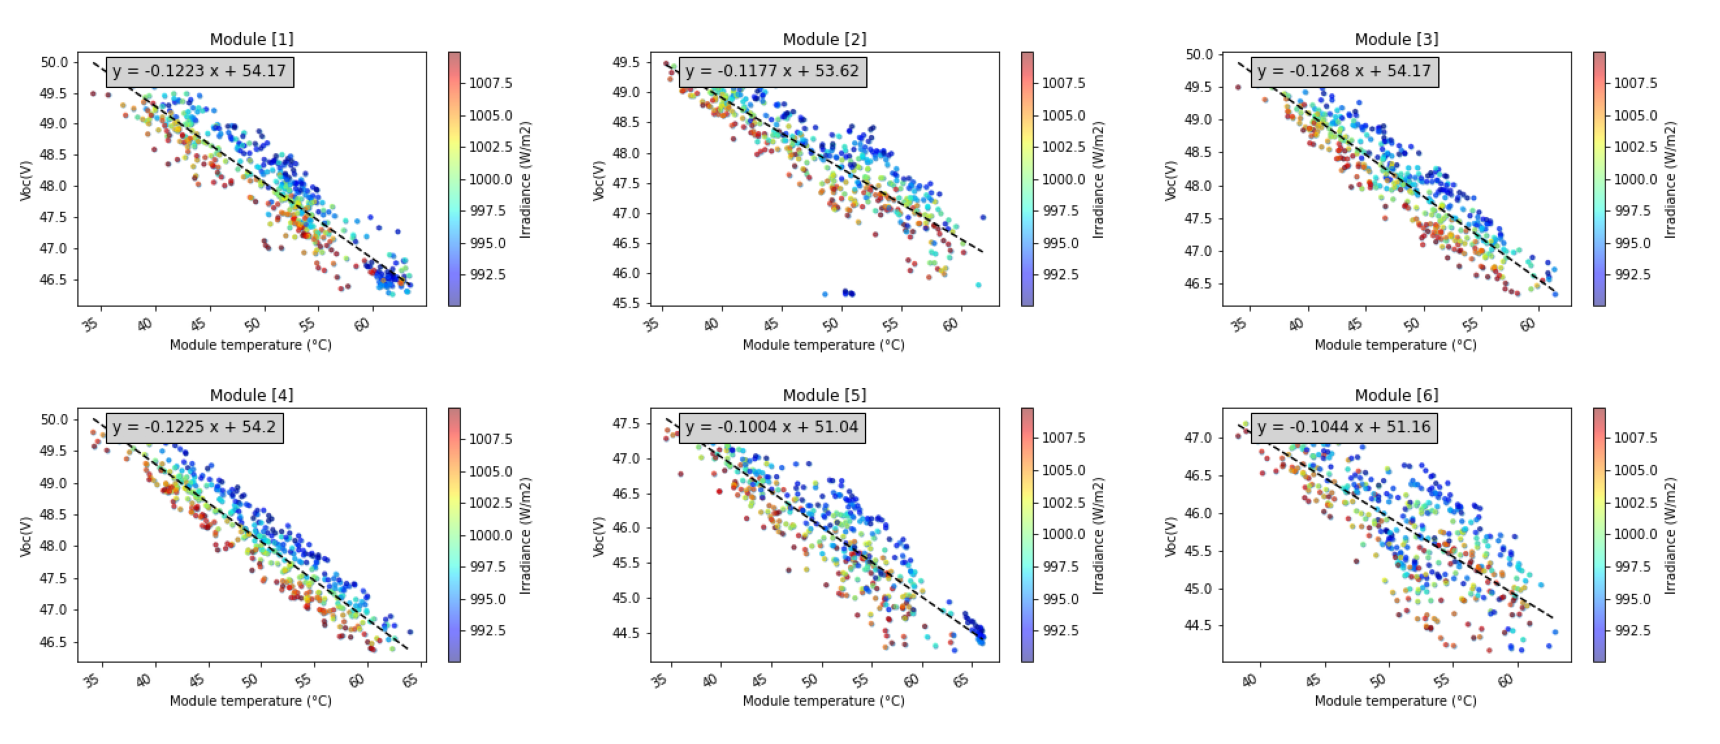

In [55]:
available_list = ['Absolute humidity %', 'Ambient temperature (C)', 'Module temperature (C)', 'Irradiance (W/m2)', 'Voc(V)', 'Isc(A)', 'Maximum power voltage (V)', 'Maximum power current (A)', 'Maximum power (W)', 'Fill factor (%)', 'Efficiency (%)']
# extract the parameter names from the number
x_name = available_list[x_param_num]
y_name = available_list[y_param_num]
color_code_name = available_list[color_code_param_num]

# clean all the image in the current directory
data1.image_deleter()


# iterate for each module
for module in module_number_list:
    module = [module]
    # data preperation
    # select the module to plot: range from 1 to 6
    data1.module_selector(module_num_list=module)

    # resample the module: options are 'hour', 'day', 'month', put anything else it will not resample.
    data1.multi_module_resampler(sample_length=sample_length, quantile_v=percentile/100)
    # print(data1.module_df_sampled)

    # Select Temperature and Irradiance range
    data1.bin_selector(param_name='MT', centre_value=T_central, rangevalue=dT)
    data1.bin_selector(param_name='IR_BEV', centre_value=Ir_central, rangevalue=dIr)
    data1.bin_selector(param_name='Isc', centre_value=14, rangevalue=1)

    # correct for irradiance for Isc
    data1.irradiance_correction()

    # plotting
    data1.data_parameter_plot_multimodule(x_name=data1.param_name_dict[str(x_name)], y_name=data1.param_name_dict[str(y_name)], linear_fit=True, color_code=True, color_name=data1.param_name_dict[str(color_code_name)], module_title=True, export_figure=True, transparency=0.5)

# collect the exported figure into a subplot
if len(module_number_list) > 1:
    data1.subplot_collector()

# do the cropping for the case when the figure number is 5
if len(module_number_list) == 5:
    data1.five_image_subplot()

## 5. Plotting the degradation with colour bar

### 5.1. Input

* "Module_number_list": is a list of number of modules, we have six module ranging from 1 to 6. Here we can only choose one module if we need the color bar.
* The "y_param_num" and "color_code_param_num" are the number to select the parameter on, y axis and the color bar repsectively. In this plot the x axis will be time. The number and the corresponding parameters are shown below:

| Parameter number | Parameter name |
| --- | --- |
| 0 | Absolute humidity % |
| 1 | Ambient temperature (C) |
| 2 | Modulte temperature (C) |
| 3 | Irradiance (W/m2) |
| 4 | Voc(V) |
| 5 | Isc(A) |
| 6 | Maximum power voltage (V) |
| 7 | Maximum power current (A) |
| 8 | Maximum power (W) |
| 9 | Fill factor (%) |
| 10 | Efficiency (%) |


In [51]:
# select the module to plot: only one module
module_number_list = [1, 2, 4, 3, 5, 6]
# select the parameter to compare on
y_param_num = 4
# select the parameter to apply colour code
color_code_param_num = 9

### 5.2. Plotting

c:\Users\sijin wang\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\apply.py:577: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  return f(*args, **kwargs)


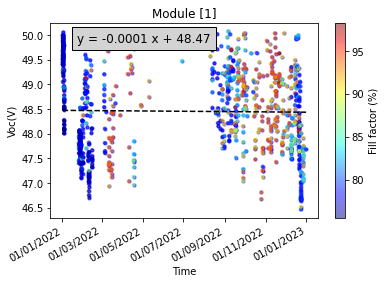

c:\Users\sijin wang\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\apply.py:577: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  return f(*args, **kwargs)


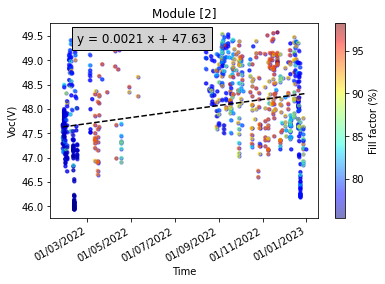

c:\Users\sijin wang\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\apply.py:577: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  return f(*args, **kwargs)


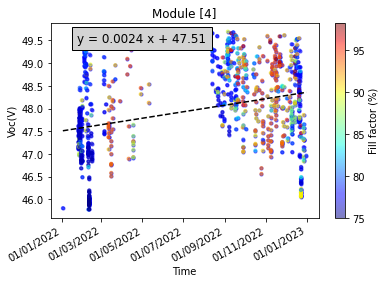

c:\Users\sijin wang\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\apply.py:577: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  return f(*args, **kwargs)


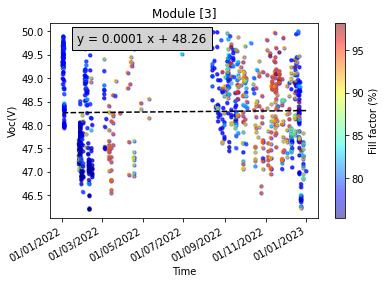

c:\Users\sijin wang\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\apply.py:577: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  return f(*args, **kwargs)


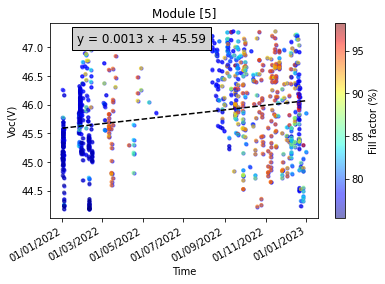

c:\Users\sijin wang\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\apply.py:577: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  return f(*args, **kwargs)


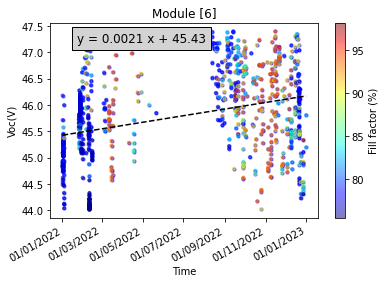

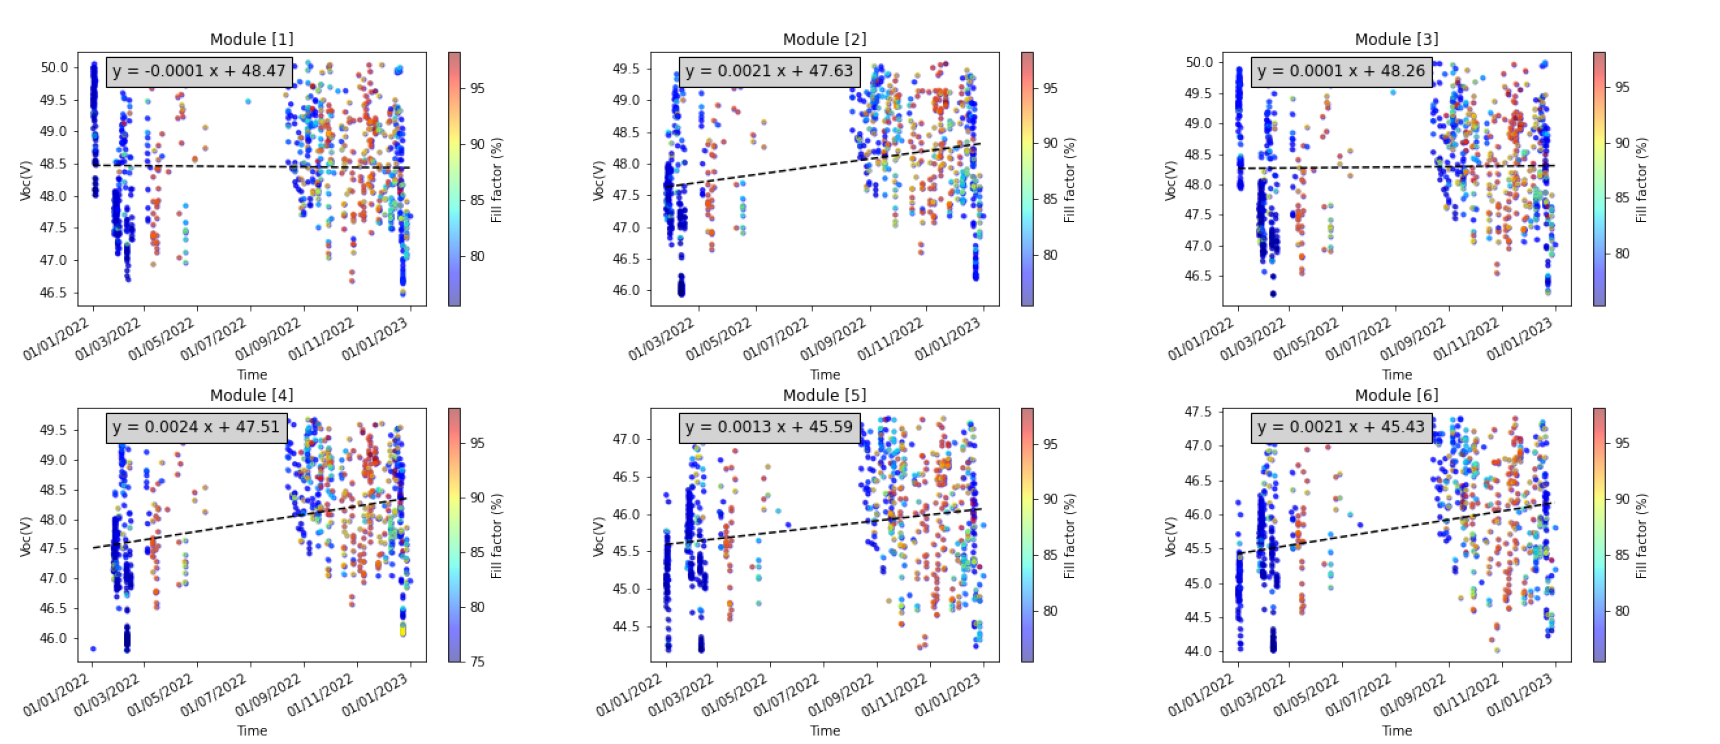

In [52]:
available_list = ['Absolute humidity %', 'Ambient temperature (C)', 'Module temperature (C)', 'Irradiance (W/m2)', 'Voc(V)', 'Isc(A)', 'Maximum power voltage (V)', 'Maximum power current (A)', 'Maximum power (W)', 'Fill factor (%)', 'Efficiency (%)']
# extract the parameter names from the number
# x_name = available_list[x_param_num]
y_name = available_list[y_param_num]
color_code_name = available_list[color_code_param_num]

# clean all the image in the current directory
data1.image_deleter()

# iterate for each module
for module in module_number_list:
    # select the module to plot: range from 1 to 6
    data1.module_selector(module_num_list=[module])

    # resample the module: options are 'hour', 'day', 'month', put anything else it will not resample.
    data1.multi_module_resampler(sample_length=sample_length, quantile_v=percentile/100)

    # Select Temperature and Irradiance range
    data1.bin_selector(param_name='MT', centre_value=T_central, rangevalue=dT)
    data1.bin_selector(param_name='IR_BEV', centre_value=Ir_central, rangevalue=dIr)

    # plotting
    data1.data_ploter_with_time_multimodule(target_name=data1.param_name_dict[str(y_name)], linear_fit=True, color_code=True, color_name=data1.param_name_dict[str(color_code_name)], export_figure=True, module_title=True)

# collect the exported figure into a subplot
if len(module_number_list) > 1:
    data1.subplot_collector()

# do the cropping for the case when the figure number is 5
if len(module_number_list) == 5:
    data1.five_image_subplot()